In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2017-12-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
tsla = quandl.get('WIKI/TSLA.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/amzn.11',start_date=start,end_date=end)
twtr = quandl.get('WIKI/twtr.11',start_date=start,end_date=end)

In [4]:
aapl.tail()

,Adj. Close
Date,
2017-11-27,174.09
2017-11-28,173.07
2017-11-29,169.48
2017-11-30,171.85
2017-12-01,171.05


In [5]:
#start_date price

In [6]:
aapl.iloc[0]['Adj. Close'] 

103.86395724039

In [7]:
amzn.iloc[0]['Adj. Close'] 

308.52

In [8]:
tsla.iloc[0]['Adj. Close'] 

219.31

In [9]:
twtr.iloc[0]['Adj. Close'] 

36.56

In [10]:
for stock_df in (aapl,amzn,twtr,tsla):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']


,Adj. Close,Normed Return
Date,,
2015-01-02,103.863957,1.000000
2015-01-05,100.937944,0.971828
2015-01-06,100.947444,0.971920
2015-01-07,102.362951,0.985548
2015-01-08,106.295968,1.023415


,Adj. Close,Normed Return
Date,,
2017-11-27,1195.83,3.876021
2017-11-28,1193.60,3.868793
2017-11-29,1161.27,3.764002
2017-11-30,1176.75,3.814177
2017-12-01,1162.35,3.767503


In [16]:
for stock_df, allo in zip((aapl,amzn,twtr,tsla),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [17]:
for stock_df in (aapl,amzn,twtr,tsla):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000

In [18]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2015-01-02,103.863957,1.000000,0.300000,300.000000
2015-01-05,100.937944,0.971828,0.291549,291.548523
2015-01-06,100.947444,0.971920,0.291576,291.575963
2015-01-07,102.362951,0.985548,0.295665,295.664502
2015-01-08,106.295968,1.023415,0.307025,307.024604


In [22]:
all_pos = [aapl['Position Values'],amzn['Position Values'],tsla['Position Values'],twtr['Position Values']]
portf = pd.concat(all_pos, axis = 1)


In [24]:
portf.head().round()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2015-01-02,300.0,200.0,100.0,400.0
2015-01-05,292.0,196.0,96.0,398.0
2015-01-06,292.0,191.0,96.0,424.0
2015-01-07,296.0,193.0,96.0,408.0
2015-01-08,307.0,195.0,96.0,428.0


In [25]:
portf.columns = ['AAPL Position','AMZN Position','TSLA Position','TWTR Position']

In [31]:
portf['Total Position'] = portf.sum(axis=1)  

In [32]:
portf

,AAPL Position,AMZN Position,TSLA Position,TWTR Position,Total Position
Date,,,,,
2015-01-02,300.000000,200.000000,100.000000,400.000000,1000.000000
2015-01-05,291.548523,195.896538,95.795905,398.030635,981.271601
2015-01-06,291.575963,191.423571,96.338516,424.070022,1003.408071
2015-01-07,295.664502,193.452612,96.188044,407.877462,993.182620
2015-01-08,307.024604,194.775055,96.035293,427.680525,1025.515477
...,...,...,...,...,...
2017-11-27,502.840460,775.204201,144.457617,238.730853,1661.233131
2017-11-28,499.894298,773.758589,144.795039,238.840263,1657.288189
2017-11-29,489.524965,752.800467,140.230724,227.461707,1610.017862


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

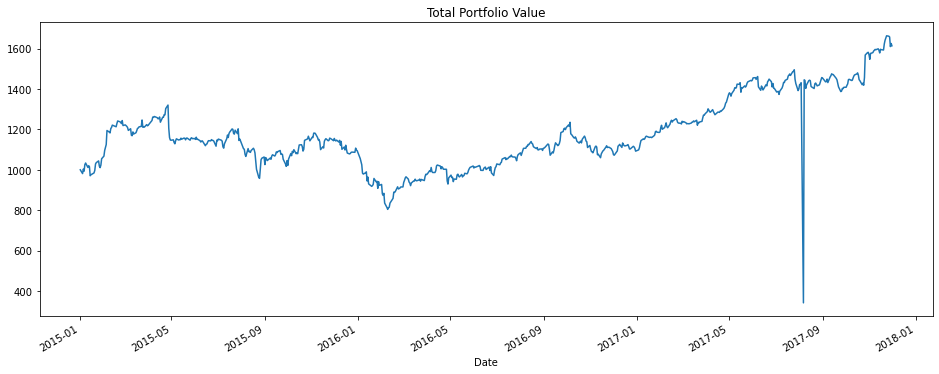

In [39]:
portf['Total Position'].plot(figsize=(16,6))
plt.title('Total Portfolio Value');

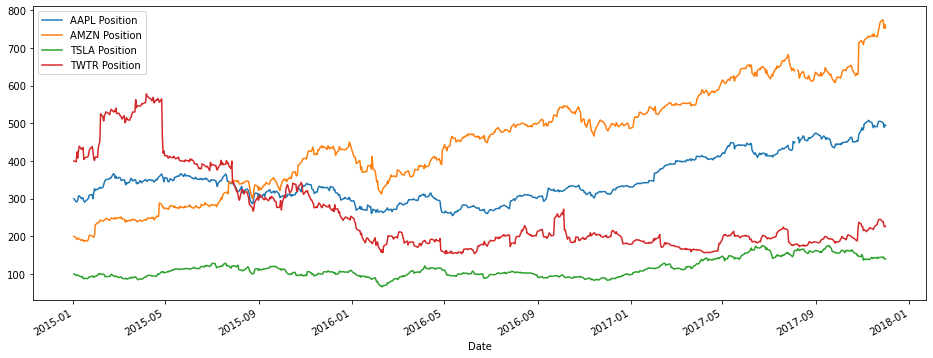

In [41]:
portf.drop('Total Position',axis=1).plot(figsize=(16,6));

In [47]:
portf['Daily Return']=portf['Total Position'].pct_change(1)

In [45]:
portf.head()

,AAPL Position,AMZN Position,TSLA Position,TWTR Position,Total Position,Daily Returns
Date,,,,,,
2015-01-02,300.000000,200.000000,100.000000,400.000000,1000.000000,NaN
2015-01-05,291.548523,195.896538,95.795905,398.030635,981.271601,-0.018728
2015-01-06,291.575963,191.423571,96.338516,424.070022,1003.408071,0.022559
2015-01-07,295.664502,193.452612,96.188044,407.877462,993.182620,-0.010191
2015-01-08,307.024604,194.775055,96.035293,427.680525,1025.515477,0.032555


In [71]:
portf['Daily Return'].mean()

0.004111816051402115

In [50]:
portf['Daily Return'].std()

0.12349637429067885

<AxesSubplot:ylabel='Density'>

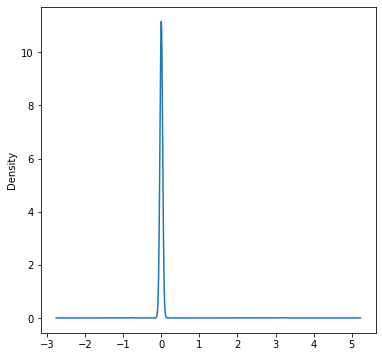

In [63]:
portf['Daily Return'].plot(kind='kde',figsize=(6,6))

In [64]:
cumulative_return = 100 *(portf['Total Position'][-1]/portf['Total Position'][0] - 1)

In [65]:
cumulative_return

61.391694780523956

In [66]:
portf['Total Position'][-1]

1613.9169478052395

In [67]:
#sharpe ratio
SR = portf['Daily Return'].mean() / portf['Daily Return'].std()

In [69]:
ASR = (252**.5) * SR #ANNAUL SR

In [70]:
ASR

0.5285422882090884